# INTRODUCCION:

En el complejo escenario financiero de Argentina, donde la alta inflación y las tasas de interés volátiles son la norma, la gestión y administración del riesgo son fundamentales, especialmente en el sector minorista. En esta presentación, exploraremos cómo el deterioro del comportamiento de pago afecta no solo a las instituciones financieras, sino también a sus clientes. Vamos a sumergirnos en un mundo donde el riesgo se convierte en una variable crucial que influye en varios aspectos, desde el financiamiento hasta la rentabilidad y la percepción pública.

Imagínense un escenario donde la toma de decisiones está plagada de incertidumbre, y cada movimiento puede tener un impacto profundo en la salud financiera de las instituciones y la calidad de vida de sus clientes. Hoy, embarcaremos en un viaje para comprender cómo mejorar la gestión de riesgos en el segmento de menores ingresos en Argentina se ha convertido en un desafío apremiante.

En esta viaje, exploraremos cómo:

1) Fondeo se ha vuelto una batalla estratégica en un entorno financiero incierto, donde la confianza de los inversionistas puede cambiar rápidamente.
2) Rentabilidad se ve directamente impactada por el comportamiento de pago y cómo las organizaciones deben adaptarse para mantener su margen.
3) Imagen Pública es vital, ya que las instituciones financieras deben navegar cuidadosamente en un mundo donde la percepción es tan importante como la realidad.

Los clientes enfrentan un costo de compra que está intrínsecamente ligado al riesgo del producto o segmento. 
La principal pregunta que debemos hacernos es:
* ¿Es posible en un escenario como el Actual de Argentina equilibrar la accesibilidad financiera?
* ¿Tenemos las herramientas que permitan realizar una elegibilidad de cliente para aplicar determinada tasa/riesgo, sin que sea solidaria respecto al resto?

# OBJETIVOS:
El objetivo central de nuestro proyecto es mejorar el proceso de calificación de clientes en el sector minorista de instituciones financieras, aprovechando la combinación de motores de decisión existentes en el mercado con nuestra vasta experiencia de 30 años en el mismo. Buscamos lograr una mejora significativa en la calidad de los servicios que ofrecemos, con un enfoque en los siguientes aspectos clave:
1) Calificación de Prospectos: Identificar características particulares y comportamientos de clientes actuales para perfeccionar la calificación de prospectos.
2) Mejora en los Servicios: Buscamos mejorar nuestros servicios en términos de oferta, plazos y tasas de crédito, con el objetivo de:
    * Incrementar los montos de dinero ofrecidos a los clientes.
    * Mejorar los plazos de crédito para nuestros clientes.
    * Reducir las tasas de interés ofrecidas.
3) Beneficios para la Organización: Esperamos que esta mejora en la calidad del servicio tenga un impacto positivo en diversos aspectos de la organización, incluyendo:
    * Mayor eficiencia en la segmentación de clientes.
    * Mejora en la gestión de riesgos y cobranzas.
    * Incremento en la rentabilidad.
    * Mejora en la gestión de fondeo.
    * Mejora en las previsiones financieras.
    * Cumplimiento de los requisitos de capital frente al BCRA.
    * Mejora en la imagen pública de la organización.
    * Exploración de nuevos segmentos de mercado.

# Preguntas a Responder con el Analisis:
* Establecer Grupos o Cluster con comportamientos similares.
    - Edad
    - Sexo
    - Segmento Socioeconomico
* Identificar comportamientos o patrones que permitan clasificarlos según:
    - Buenos Pagadores
    - Con Atraso (< 90 días)
    - Con Problemas (> 90 días)
    - Otros.
* Poder determinar cual es el mejor modelo de predicción que permita acercarnos más a este problema. 
    - Regresión Logistica
    - KNN
    - Random Forest

#### Librerias:

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import sklearn
import statsmodels
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from scipy import stats

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Inicio del Analisis de los Datos:

## 1) Cargar Data Set "solicitudes":

In [111]:
ruta_solicitudes = 'C:\\VDi Control Gestión (PC Local)\\DS\\Solicitudes_2022.csv'
solicitudes = pd.read_csv(ruta_solicitudes, delimiter= ';')
solicitudes.head()

,NU_EVALUACION,CD_CLIENTE,CD_SUCURSAL,TX_SEXO,NU_EDAD,TX_ESTADO_CIVIL,NU_ANTIGUEDAD_LABORAL,TX_TIPO_EMPLEO_CLIENTE,TX_PROVINCIA,TX_TIPO_CLIENTE,...,VL_MONTO_MAXIMO,VL_SCORE_DEMOGRAFICO,VL_SCORE_CENDEU,VL_SCORE_NOSIS,VL_SCORE_VERAZ,NU_PRODUCTO,FC_LIQUIDACION,CD_PRODUCTO,VL_DESEMBOLSADO,VL_CUOTA
0,11359589,2730873.0,604.0,MASCULINO,47.0,SOLTERO,25.0,FUERZAS ARMADAS SUBOFICIALES,TUCUMAN,NUEVO,...,53897628.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11693929,4757803.0,61.0,FEMENINO,28.0,SOLTERO,5.0,FUERZAS ARMADAS OFICIALES,BUENOS AIRES,NUEVO,...,53897628.0,808.0,NaN,NaN,NaN,8.200962e+11,2022-01-10 00:00:00.000,515.0,360027.20,23028.69
2,11696298,4773004.0,146.0,MASCULINO,35.0,SOLTERO,5.0,FUERZAS ARMADAS SUBOFICIALES,BUENOS AIRES,NUEVO,...,53897628.0,741.0,NaN,NaN,NaN,8.200961e+11,2022-01-03 00:00:00.000,515.0,320000.00,24283.71
3,11698605,4647990.0,156.0,FEMENINO,42.0,CASADO,5.0,FUERZAS ARMADAS,BUENOS AIRES,NUEVO,...,53897628.0,874.0,NaN,NaN,NaN,8.200962e+11,2022-01-15 00:00:00.000,515.0,200000.84,22009.60
4,11706908,4584389.0,1.0,MASCULINO,27.0,SOLTERO,2.0,EMPL. ESTATAL,BUENOS AIRES,NUEVO,...,53897628.0,809.0,NaN,NaN,NaN,8.200961e+11,2022-01-03 00:00:00.000,518.0,160000.00,17612.93


In [112]:
solicitudes.columns

Index(['NU_EVALUACION', 'CD_CLIENTE', 'CD_SUCURSAL', 'TX_SEXO', 'NU_EDAD',
       'TX_ESTADO_CIVIL', 'NU_ANTIGUEDAD_LABORAL', 'TX_TIPO_EMPLEO_CLIENTE',
       'TX_PROVINCIA', 'TX_TIPO_CLIENTE', 'TX_ESTADO_EVALUACION_DWH',
       'TX_CANAL_ORIGINAL', 'VL_INGRESO_NOSIS', 'VL_INGRESO_VERAZ',
       'VL_CUOTA_MAXIMA', 'VL_MONTO_MAXIMO', 'VL_SCORE_DEMOGRAFICO',
       'VL_SCORE_CENDEU', 'VL_SCORE_NOSIS', 'VL_SCORE_VERAZ', 'NU_PRODUCTO',
       'FC_LIQUIDACION', 'CD_PRODUCTO', 'VL_DESEMBOLSADO', 'VL_CUOTA'],
      dtype='object')

#### Identificar el Tipo de datos en cada Columna:

In [113]:
solicitudes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450716 entries, 0 to 2450715
Data columns (total 25 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   NU_EVALUACION             int64  
 1   CD_CLIENTE                float64
 2   CD_SUCURSAL               float64
 3   TX_SEXO                   object 
 4   NU_EDAD                   float64
 5   TX_ESTADO_CIVIL           object 
 6   NU_ANTIGUEDAD_LABORAL     float64
 7   TX_TIPO_EMPLEO_CLIENTE    object 
 8   TX_PROVINCIA              object 
 9   TX_TIPO_CLIENTE           object 
 10  TX_ESTADO_EVALUACION_DWH  object 
 11  TX_CANAL_ORIGINAL         object 
 12  VL_INGRESO_NOSIS          object 
 13  VL_INGRESO_VERAZ          float64
 14  VL_CUOTA_MAXIMA           float64
 15  VL_MONTO_MAXIMO           float64
 16  VL_SCORE_DEMOGRAFICO      float64
 17  VL_SCORE_CENDEU           float64
 18  VL_SCORE_NOSIS            float64
 19  VL_SCORE_VERAZ            float64
 20  NU_PRODUCTO             

#### Identificar Cantidad de Valores Nulos:

In [114]:
nan_solicitudes = solicitudes.isna().sum()
nan_solicitudes

NU_EVALUACION                     0
CD_CLIENTE                  1365798
CD_SUCURSAL                    3958
TX_SEXO                         789
NU_EDAD                          10
TX_ESTADO_CIVIL              225151
NU_ANTIGUEDAD_LABORAL        228676
TX_TIPO_EMPLEO_CLIENTE       496443
TX_PROVINCIA                   1713
TX_TIPO_CLIENTE                   0
TX_ESTADO_EVALUACION_DWH          0
TX_CANAL_ORIGINAL                 2
VL_INGRESO_NOSIS             982736
VL_INGRESO_VERAZ            2450716
VL_CUOTA_MAXIMA              717941
VL_MONTO_MAXIMO              717941
VL_SCORE_DEMOGRAFICO         861278
VL_SCORE_CENDEU             2450716
VL_SCORE_NOSIS               711930
VL_SCORE_VERAZ               712095
NU_PRODUCTO                 2264548
FC_LIQUIDACION              2264573
CD_PRODUCTO                 2264564
VL_DESEMBOLSADO             2264564
VL_CUOTA                    2264564
dtype: int64

In [115]:
porc_nan_solicitudes = (nan_solicitudes / solicitudes.shape[0])*100
porc_nan_solicitudes

NU_EVALUACION                 0.000000
CD_CLIENTE                   55.730570
CD_SUCURSAL                   0.161504
TX_SEXO                       0.032195
NU_EDAD                       0.000408
TX_ESTADO_CIVIL               9.187152
NU_ANTIGUEDAD_LABORAL         9.330987
TX_TIPO_EMPLEO_CLIENTE       20.257060
TX_PROVINCIA                  0.069898
TX_TIPO_CLIENTE               0.000000
TX_ESTADO_EVALUACION_DWH      0.000000
TX_CANAL_ORIGINAL             0.000082
VL_INGRESO_NOSIS             40.099954
VL_INGRESO_VERAZ            100.000000
VL_CUOTA_MAXIMA              29.295153
VL_MONTO_MAXIMO              29.295153
VL_SCORE_DEMOGRAFICO         35.143933
VL_SCORE_CENDEU             100.000000
VL_SCORE_NOSIS               29.049878
VL_SCORE_VERAZ               29.056610
NU_PRODUCTO                  92.403526
FC_LIQUIDACION               92.404546
CD_PRODUCTO                  92.404179
VL_DESEMBOLSADO              92.404179
VL_CUOTA                     92.404179
dtype: float64

#### Identificar Valores Duplicados y Darle tratamiento:

In [116]:
cant_duplicados = solicitudes['CD_CLIENTE'].duplicated().sum()
total_filas = len(solicitudes)
porc_duplicados = (cant_duplicados / total_filas) * 100
porc_duplicados

83.20588758550562

En este paso *IDENTIFICAMOS* que tenemos el 82% de Datos duplicados en cuanto a consultas de clientes, en el preriodo de 24 Meses, obtenemos los siguientes **Insights**:
* Nuevos *prospectos* realizan consultas por diferentes canales de atención.
* Clietes existentes o conocidos, realizan consultas de forma periodica sin finalizar la compra, solo a modo informativo.
* Por parte de Asistentes Comerciales, se realizan consultas de manera proactiva para conocer la oferta real a cada cliente.

#### Analizar Cuantos de Los Clientes Duplicados Tiene Resultado Rechazado:

In [117]:
agrup_estado = solicitudes.groupby('TX_ESTADO_EVALUACION_DWH').size()
agrup_estado

TX_ESTADO_EVALUACION_DWH
APROBADA       696005
RECHAZADA     1540946
SIN ESTADO     213765
dtype: int64

In [118]:
suma_estado = agrup_estado.sum()
suma_estado

2450716

In [119]:
porc_estados = (agrup_estado / suma_estado)*100
porc_estados

TX_ESTADO_EVALUACION_DWH
APROBADA      28.400068
RECHAZADA     62.877380
SIN ESTADO     8.722553
dtype: float64

En este Apartado obtenemos información que **SOLO** el **28%** de las Solicitudes/Consultas de clientes son APROBADAS, el resto es rechazada por la Politica de créditos implementada para el periodo Analizado.-

#### ANALISIS de Solicitudes DUPLICADAS:

En estos puntos vamos a **discriminar** solicitudes Duplicadas por Resultado de Evaluación, es decir por RECHAZADA, APROBADA y SIN ESTADO.
Donde vamos a obtener los Insights respecto a donde se encuentra el mayor impacto y determinar que tipo de procedimiento podemos aplicar para un mejor analisis del DataSet.

In [120]:
solic_rech = solicitudes[solicitudes['TX_ESTADO_EVALUACION_DWH']=='RECHAZADA']
rech_duplicados = solic_rech[solic_rech.duplicated(subset = ['CD_CLIENTE'], keep= False)].count()

In [121]:
total_filas = len(solicitudes)
porc_dup_rech = (rech_duplicados / total_filas) * 100
porc_dup_rech

NU_EVALUACION               57.171374
CD_CLIENTE                  18.825233
CD_SUCURSAL                 57.169986
TX_SEXO                     57.164437
NU_EDAD                     57.171374
TX_ESTADO_CIVIL             50.912835
NU_ANTIGUEDAD_LABORAL       50.844774
TX_TIPO_EMPLEO_CLIENTE      42.200443
TX_PROVINCIA                57.171251
TX_TIPO_CLIENTE             57.171374
TX_ESTADO_EVALUACION_DWH    57.171374
TX_CANAL_ORIGINAL           57.171292
VL_INGRESO_NOSIS            32.103271
VL_INGRESO_VERAZ             0.000000
VL_CUOTA_MAXIMA             36.238675
VL_MONTO_MAXIMO             36.238675
VL_SCORE_DEMOGRAFICO        32.922297
VL_SCORE_CENDEU              0.000000
VL_SCORE_NOSIS              36.054484
VL_SCORE_VERAZ              36.054280
NU_PRODUCTO                  0.000000
FC_LIQUIDACION               0.000000
CD_PRODUCTO                  0.000000
VL_DESEMBOLSADO              0.000000
VL_CUOTA                     0.000000
dtype: float64

En Solicitudes **RECHAZADAS** tenemos que el 57% de las Solicitudes son Duplicadas.-

#### Solicitudes APROBADAS DUPLICADAS:
Eliminar Filas duplicadas

In [122]:
solic_aprob = solicitudes[solicitudes['TX_ESTADO_EVALUACION_DWH']=='APROBADA']
aprob_duplicados = solic_aprob[solic_aprob.duplicated(subset = ['CD_CLIENTE'], keep= False)].count()

total_filas = len(solicitudes)
porc_dup_aprob = (aprob_duplicados / total_filas) * 100
porc_dup_aprob

NU_EVALUACION               23.175676
CD_CLIENTE                   9.707898
CD_SUCURSAL                 23.157028
TX_SEXO                     23.168127
NU_EDAD                     23.175554
TX_ESTADO_CIVIL             23.175554
NU_ANTIGUEDAD_LABORAL       23.175676
TX_TIPO_EMPLEO_CLIENTE      23.175676
TX_PROVINCIA                23.175309
TX_TIPO_CLIENTE             23.175676
TX_ESTADO_EVALUACION_DWH    23.175676
TX_CANAL_ORIGINAL           23.175676
VL_INGRESO_NOSIS            20.402650
VL_INGRESO_VERAZ             0.000000
VL_CUOTA_MAXIMA             23.175676
VL_MONTO_MAXIMO             23.175676
VL_SCORE_DEMOGRAFICO        21.553048
VL_SCORE_CENDEU              0.000000
VL_SCORE_NOSIS              23.003237
VL_SCORE_VERAZ              22.999809
NU_PRODUCTO                  4.472611
FC_LIQUIDACION               4.471714
CD_PRODUCTO                  4.472040
VL_DESEMBOLSADO              4.472040
VL_CUOTA                     4.472040
dtype: float64

En Solicitudes **APROBADAS** tenemos que el 23% de las Solicitudes son Duplicadas.-

#### Solicitudes SIN ESTADO DUPLICADAS:

In [123]:
solic_sin_estado = solicitudes[solicitudes['TX_ESTADO_EVALUACION_DWH']=='SIN ESTADO']
sin_estado_duplicados = solic_sin_estado[solic_sin_estado.duplicated(subset = ['CD_CLIENTE'], keep= False)].count()

total_filas = len(solicitudes)
porc_dup_sin_estado = (sin_estado_duplicados / total_filas) * 100
porc_dup_sin_estado

NU_EVALUACION               6.555513
CD_CLIENTE                  2.638861
CD_SUCURSAL                 6.465253
TX_SEXO                     6.540170
NU_EDAD                     6.555227
TX_ESTADO_CIVIL             3.944562
NU_ANTIGUEDAD_LABORAL       3.922690
TX_TIPO_EMPLEO_CLIENTE      3.269698
TX_PROVINCIA                6.496632
TX_TIPO_CLIENTE             6.555513
TX_ESTADO_EVALUACION_DWH    6.555513
TX_CANAL_ORIGINAL           6.555513
VL_INGRESO_NOSIS            1.235639
VL_INGRESO_VERAZ            0.000000
VL_CUOTA_MAXIMA             1.725496
VL_MONTO_MAXIMO             1.725496
VL_SCORE_DEMOGRAFICO        1.650252
VL_SCORE_CENDEU             0.000000
VL_SCORE_NOSIS              2.347722
VL_SCORE_VERAZ              2.347722
NU_PRODUCTO                 0.000000
FC_LIQUIDACION              0.000000
CD_PRODUCTO                 0.000000
VL_DESEMBOLSADO             0.000000
VL_CUOTA                    0.000000
dtype: float64

En Solicitudes **SIN ESTADO** tenemos que el 7% de las Solicitudes son Duplicadas.
Estas Solicitudes son las que no finalizaron por decisión del cliente o por problemas técnico durante el proceso.

### ELIMINAR filas Duplicadas (CD_CLIENTE):

In [124]:
solic_unicas = solicitudes.drop_duplicates(subset=['CD_CLIENTE'])
solic_unicas.head()

,NU_EVALUACION,CD_CLIENTE,CD_SUCURSAL,TX_SEXO,NU_EDAD,TX_ESTADO_CIVIL,NU_ANTIGUEDAD_LABORAL,TX_TIPO_EMPLEO_CLIENTE,TX_PROVINCIA,TX_TIPO_CLIENTE,...,VL_MONTO_MAXIMO,VL_SCORE_DEMOGRAFICO,VL_SCORE_CENDEU,VL_SCORE_NOSIS,VL_SCORE_VERAZ,NU_PRODUCTO,FC_LIQUIDACION,CD_PRODUCTO,VL_DESEMBOLSADO,VL_CUOTA
0,11359589,2730873.0,604.0,MASCULINO,47.0,SOLTERO,25.0,FUERZAS ARMADAS SUBOFICIALES,TUCUMAN,NUEVO,...,53897628.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11693929,4757803.0,61.0,FEMENINO,28.0,SOLTERO,5.0,FUERZAS ARMADAS OFICIALES,BUENOS AIRES,NUEVO,...,53897628.0,808.0,NaN,NaN,NaN,8.200962e+11,2022-01-10 00:00:00.000,515.0,360027.20,23028.69
2,11696298,4773004.0,146.0,MASCULINO,35.0,SOLTERO,5.0,FUERZAS ARMADAS SUBOFICIALES,BUENOS AIRES,NUEVO,...,53897628.0,741.0,NaN,NaN,NaN,8.200961e+11,2022-01-03 00:00:00.000,515.0,320000.00,24283.71
3,11698605,4647990.0,156.0,FEMENINO,42.0,CASADO,5.0,FUERZAS ARMADAS,BUENOS AIRES,NUEVO,...,53897628.0,874.0,NaN,NaN,NaN,8.200962e+11,2022-01-15 00:00:00.000,515.0,200000.84,22009.60
4,11706908,4584389.0,1.0,MASCULINO,27.0,SOLTERO,2.0,EMPL. ESTATAL,BUENOS AIRES,NUEVO,...,53897628.0,809.0,NaN,NaN,NaN,8.200961e+11,2022-01-03 00:00:00.000,518.0,160000.00,17612.93


In [125]:
solicitudes.shape[0] 

2450716

In [126]:
solic_unicas.shape[0]

411576

In [127]:
cant_filas_elim= solicitudes.shape[0] - solic_unicas.shape[0]
cant_filas_elim

2039140

In [128]:
porcent_elim = (cant_filas_elim / total_filas)*100
porcent_elim

83.20588758550562

Se eliminaron un total de 2MM de lineas un 83% del DataSet, de los cuales como referenciabamos antes, casi el 60% correspondian a solicitudes rechazadas.
Que de momento vamos a Excluir del Analisis, y solo nos vamos a enfocar en Solicitdudes **UNICAS** por cada resultado de evaluación.

### AGRUPADAS por SCORE NOSIS:

#### Por Tipo de Sexo y Segmento Socioeconomico

In [129]:
solic_unicas.groupby('VL_INGRESO_NOSIS').size()

VL_INGRESO_NOSIS
A       468
B      2021
C1    14724
C2    29098
C3    27897
D1    38159
D2    69843
NC      144
dtype: int64

In [130]:
ag_sexo = solic_unicas.pivot_table(index='VL_INGRESO_NOSIS', columns='TX_SEXO', aggfunc='size', fill_value=0)
total_counts = ag_sexo.sum(axis=1)
porc_tabla = ag_sexo.div(total_counts, axis=0) * 100
porc_tabla['Cantidad'] = ag_sexo.sum(axis=1)

porc_tabla

TX_SEXO,FEMENINO,MASCULINO,Cantidad
VL_INGRESO_NOSIS,,,
A,26.282051,73.717949,468
B,32.326733,67.673267,2020
C1,35.059111,64.940889,14718
C2,40.790786,59.209214,29085
C3,45.893702,54.106298,27884
D1,64.213617,35.786383,38143
D2,64.331037,35.668963,69817
NC,56.250000,43.750000,144


De esta tabla podemos observar los siguientes Insights:
* El semento más alto de la **Segmentación Socioeconómica**, A, predomina el Sexo Masculino en un 73% del total del grupo.
* Lo mismo sucede en los segmentos posteriores, B, C1 y C2.
* El equilibrio se alcanza en el segmento C3 y en los posteriores, es el Sexo Femenico que tiene mayor incidencia en los segmentos sociales más bajo, en cuanto a "solicitudes de créditos".

Si bien el Sexo **Femenino** es el que mayor cantidad de solicitdes posee, observamos que son los segmentos socioeconomicos más bajos los que realizan la mayor cantidad de solicitud.
Existiendo una marcada diferencia en los segmentos mas altos, en cuanto a Solicitud de créditos.
Sin poder determinar a ciencia cierta, si la diferencia es por la falta de personas de Sexo femenino en ese grupo etario o corresponde a una mejor administración financiera por parte del segmento femenino que no necesita de créditos de terceros.-

In [131]:
std_por_ing_nosis = ag_sexo.std()
std_por_ing_nosis

TX_SEXO
FEMENINO     15568.466049
MASCULINO     9098.882675
dtype: float64

#### Por Situacion Socioeconomica y Tipo de Sexo

In [132]:
ag_ing_nosis = solic_unicas.pivot_table(index='TX_SEXO', columns='VL_INGRESO_NOSIS', aggfunc='size', fill_value=0)
total_counts = ag_ing_nosis.sum(axis=1)
porc_tabla2 = ag_ing_nosis.div(total_counts, axis=0) * 100

porc_tabla2['Cantidad'] = total_counts

porc_tabla2

VL_INGRESO_NOSIS,A,B,C1,C2,C3,D1,D2,NC,Cantidad
TX_SEXO,,,,,,,,,
FEMENINO,0.122896,0.652445,5.155618,11.853924,12.786132,24.472199,44.875856,0.080931,100085
MASCULINO,0.419739,1.663138,11.628586,20.951651,18.355354,16.607052,30.297832,0.076648,82194


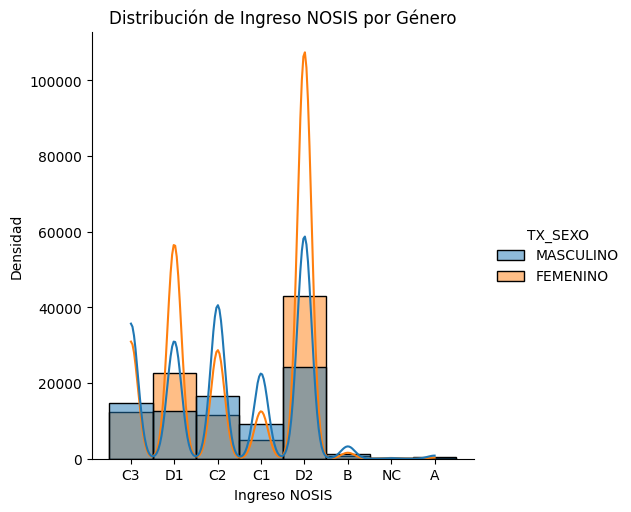

In [279]:
sns.displot(data=solic_unicas, x='VL_INGRESO_NOSIS', hue='TX_SEXO', kde=True)
plt.xlabel('Ingreso NOSIS')
plt.ylabel('Densidad')
plt.title('Distribución de Ingreso NOSIS por Género')

plt.show()

Observamos en este grafico que la Densidad para el tipo de Sexo Femenino es mas alta en los segmentos Socioeconomicos más bajos.

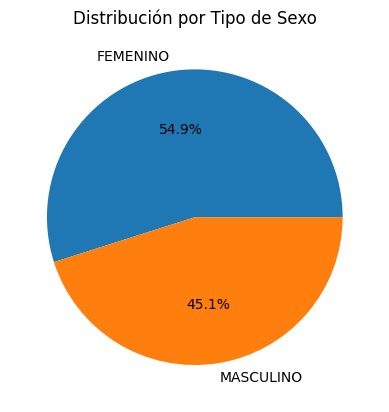

In [133]:
y = porc_tabla2['Cantidad'].tolist()
plt.pie(y, labels=porc_tabla2.index, autopct='%1.1f%%')

plt.title('Distribución por Tipo de Sexo')
plt.show()

In [134]:
std_ag_ing_nosis = ag_ing_nosis.std()
std_ag_ing_nosis

VL_INGRESO_NOSIS
A       156.977705
B       504.874242
C1     3109.855624
C2     3787.971027
C3     1619.274529
D1     7667.158828
D2    14149.913798
NC       12.727922
dtype: float64

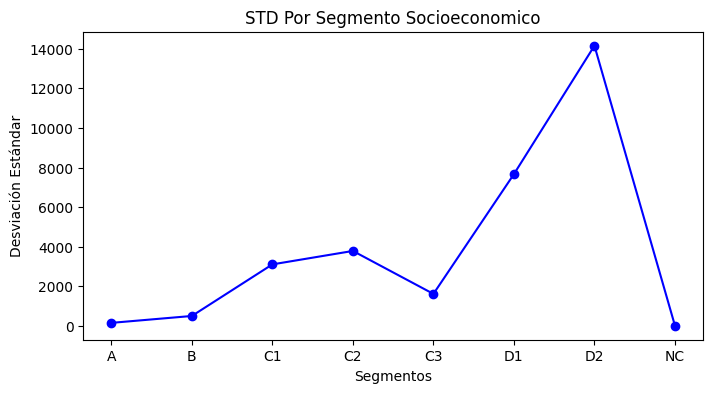

In [135]:
plt.figure(figsize=(8, 4))
std_ag_ing_nosis.plot(kind='line', marker='o', color='blue', linestyle='-')

plt.title('STD Por Segmento Socioeconomico')
plt.xlabel('Segmentos')
plt.ylabel('Desviación Estándar')

plt.show()

#### CONCLUSION:
De las STD y el grafico podemos observar lo siguiente, en los segmentos:
* A: tiene el std más bajo, por lo que la los datos tienden a una menor disperción de la media, individuos con mismas caracteristicas sociales, economicas y financieras, mas homogeneo.
* D1 y D2: tienen la std más alta, por lo que tienen una mayor variabilidad y dispeción de la media.
* C1 y C2: estan asociados a una alta variabilidad por lo que existen individuos con diferentes niveles de ingreso, social y demas variables, lo que los hace más heterogeneos.
* C3, presenta un comportamiento diferente, menos variabilidad que los segmentos asociados C1 y C2. **IMPORTANTE**, para darle atención y revisar como se comporta nuestro motor de analisis a ese segmento, puntual, que puede ser una **Oportunidad** de mejora.

**Alerta**, sobre los segmentos D1 y D2, ya que al tener mayor variabilidad, puede incrementar el riesgo.

In [136]:
ag_resultado = solic_unicas.groupby('TX_ESTADO_EVALUACION_DWH').size()
ag_resultado

TX_ESTADO_EVALUACION_DWH
APROBADA      165428
RECHAZADA     205418
SIN ESTADO     40730
dtype: int64

In [137]:
suma_total = ag_resultado.sum()
porc_por_grupo = (ag_resultado / suma_total) * 100
porc_por_grupo

TX_ESTADO_EVALUACION_DWH
APROBADA      40.193792
RECHAZADA     49.910102
SIN ESTADO     9.896107
dtype: float64

### ELIMINAR Resultados "SIN ESTADO":

In [138]:
solic_unicas = solic_unicas.drop(solic_unicas[solic_unicas['TX_ESTADO_EVALUACION_DWH'] == 'SIN ESTADO'].index)
solic_unicas.head()

,NU_EVALUACION,CD_CLIENTE,CD_SUCURSAL,TX_SEXO,NU_EDAD,TX_ESTADO_CIVIL,NU_ANTIGUEDAD_LABORAL,TX_TIPO_EMPLEO_CLIENTE,TX_PROVINCIA,TX_TIPO_CLIENTE,...,VL_MONTO_MAXIMO,VL_SCORE_DEMOGRAFICO,VL_SCORE_CENDEU,VL_SCORE_NOSIS,VL_SCORE_VERAZ,NU_PRODUCTO,FC_LIQUIDACION,CD_PRODUCTO,VL_DESEMBOLSADO,VL_CUOTA
0,11359589,2730873.0,604.0,MASCULINO,47.0,SOLTERO,25.0,FUERZAS ARMADAS SUBOFICIALES,TUCUMAN,NUEVO,...,53897628.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11693929,4757803.0,61.0,FEMENINO,28.0,SOLTERO,5.0,FUERZAS ARMADAS OFICIALES,BUENOS AIRES,NUEVO,...,53897628.0,808.0,NaN,NaN,NaN,8.200962e+11,2022-01-10 00:00:00.000,515.0,360027.20,23028.69
2,11696298,4773004.0,146.0,MASCULINO,35.0,SOLTERO,5.0,FUERZAS ARMADAS SUBOFICIALES,BUENOS AIRES,NUEVO,...,53897628.0,741.0,NaN,NaN,NaN,8.200961e+11,2022-01-03 00:00:00.000,515.0,320000.00,24283.71
3,11698605,4647990.0,156.0,FEMENINO,42.0,CASADO,5.0,FUERZAS ARMADAS,BUENOS AIRES,NUEVO,...,53897628.0,874.0,NaN,NaN,NaN,8.200962e+11,2022-01-15 00:00:00.000,515.0,200000.84,22009.60
4,11706908,4584389.0,1.0,MASCULINO,27.0,SOLTERO,2.0,EMPL. ESTATAL,BUENOS AIRES,NUEVO,...,53897628.0,809.0,NaN,NaN,NaN,8.200961e+11,2022-01-03 00:00:00.000,518.0,160000.00,17612.93


In [139]:
solic_unicas.shape

(370846, 25)

#### AGRUPAR:


In [140]:
solic_unicas.groupby('TX_ESTADO_EVALUACION_DWH').size()

TX_ESTADO_EVALUACION_DWH
APROBADA     165428
RECHAZADA    205418
dtype: int64

In [141]:
solic_unicas.groupby('TX_CANAL_ORIGINAL').size()

TX_CANAL_ORIGINAL
API                               109485
COBRANZAS Y SERVICIOS                819
COMPA#IA FINANCIERA ARG.               4
ENTIDADES INTERMEDIAS                  2
MUT.REFINANCIACIONES                   1
MUTUALES                            1606
SAC                                  678
SAC CBU                              240
SUCURSAL                          153301
SUCURSAL                             167
TELEFONICO                           572
TELEMARKETING                       9599
TELEMARKETING                          1
TLMK CBU                             814
WEB                                33331
WHATSAPP                           60226
dtype: int64

### AGRUPACION por Tipo de Sexo:
* Por Tipo de Sexo
    + Cantidad y Porcentaje

In [142]:
conteo_por_sexo = solic_unicas.groupby('TX_SEXO').size()
conteo_por_sexo

TX_SEXO
FEMENINO     202742
MASCULINO    168016
dtype: int64

In [143]:
total_solicitudes = solic_unicas.shape[0]
porc_por_sexo = (conteo_por_sexo / total_solicitudes) * 100
porc_por_sexo

TX_SEXO
FEMENINO     54.670133
MASCULINO    45.306138
dtype: float64

#### Femenino:

In [144]:
solic_aprob_fem = solic_unicas[(solic_unicas['TX_SEXO'] == 'FEMENINO') & (solic_unicas['TX_ESTADO_EVALUACION_DWH'] == 'APROBADA')]
conteo_aprob_fem = solic_aprob_fem.shape[0]
conteo_aprob_fem

94901

In [145]:
solic_aprob_fem = solic_unicas[(solic_unicas['TX_SEXO'] == 'FEMENINO') & (solic_unicas['TX_ESTADO_EVALUACION_DWH'] == 'APROBADA')]
conteo_aprob_fem = solic_aprob_fem.shape[0]
total_solicitudes = solic_unicas.shape[0]
porc_aprob_fem = (conteo_aprob_fem / total_solicitudes) * 100
porc_aprob_fem

25.590406799587967

#### Masculino:

In [146]:
solic_aprob_masc = solic_unicas[(solic_unicas['TX_SEXO'] == 'MASCULINO') & (solic_unicas['TX_ESTADO_EVALUACION_DWH'] == 'APROBADA')]
conteo_aprob_masc = solic_aprob_masc.shape[0]
conteo_aprob_masc

70467

In [147]:
solic_aprob_masc = solic_unicas[(solic_unicas['TX_SEXO'] == 'MASCULINO') & (solic_unicas['TX_ESTADO_EVALUACION_DWH'] == 'APROBADA')]
conteo_aprob_masc = solic_aprob_masc.shape[0]
total_solicitudes = solic_unicas.shape[0]
porc_aprob_masc = (conteo_aprob_masc / total_solicitudes) * 100
porc_aprob_masc

19.001688032229012

#### CONCLUCION:
Podemos observar que del total de solicitudes, sucede lo siguiente:
* Existe una mayor cantidad de solicitudes Del tipo de Sexo Femenino 202.000 (Vs. 168.000), un 10% superior al Sexo Masculino.
* Existe un mayor porcentaje de solicitudes Aprobadas para el Sexo Femenuno 25% (Vs. 19%), un 6% superior al Sexo Masculino.


### Grafico con Box Plot Agrupando por Tipo de Sexo:

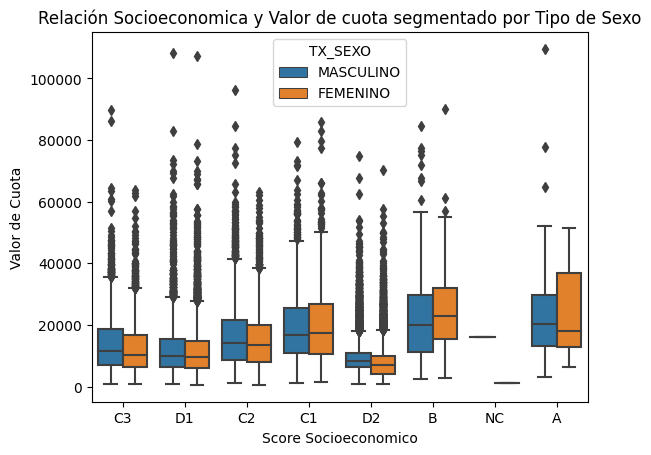

In [148]:
ax = sns.boxplot(data=solic_unicas, x = solic_unicas['VL_INGRESO_NOSIS'], y = solic_unicas['VL_CUOTA'], hue= 'TX_SEXO')
plt.xlabel ('Score Socioeconomico')
plt.ylabel ('Valor de Cuota')
plt.title ('Relación Socioeconomica y Valor de cuota segmentado por Tipo de Sexo')

plt.show()

OutLiers en los Segmentos Socioeconomicos más bajos, posiblemente estan asociados a clientes conocidos, donde los parametros de la oferta son diferentes a los aplicados a nuevos clientes.-

### AGRUPACION por Canal de Origen del Cliente:
* Por Canal de Ingreso:
    + Cantidad y Porcentaje

In [149]:
conteo_por_canal = solic_unicas.groupby('TX_CANAL_ORIGINAL').size()
conteo_por_canal

TX_CANAL_ORIGINAL
API                               109485
COBRANZAS Y SERVICIOS                819
COMPA#IA FINANCIERA ARG.               4
ENTIDADES INTERMEDIAS                  2
MUT.REFINANCIACIONES                   1
MUTUALES                            1606
SAC                                  678
SAC CBU                              240
SUCURSAL                          153301
SUCURSAL                             167
TELEFONICO                           572
TELEMARKETING                       9599
TELEMARKETING                          1
TLMK CBU                             814
WEB                                33331
WHATSAPP                           60226
dtype: int64

In [150]:
total_solicitudes = solic_unicas.shape[0]
conteo_por_canal = solic_unicas.groupby('TX_CANAL_ORIGINAL').size()
solicitudes_aprobadas = solic_unicas[solic_unicas['TX_ESTADO_EVALUACION_DWH'] == 'APROBADA']
conteo_aprobadas_por_canal = solicitudes_aprobadas.groupby('TX_CANAL_ORIGINAL').size()

porc_aprob_por_canal = (conteo_aprobadas_por_canal / conteo_por_canal) * 100
porc_aprob_por_canal

TX_CANAL_ORIGINAL
API                                26.965338
COBRANZAS Y SERVICIOS              99.755800
COMPA#IA FINANCIERA ARG.          100.000000
ENTIDADES INTERMEDIAS             100.000000
MUT.REFINANCIACIONES              100.000000
MUTUALES                           97.882939
SAC                                46.017699
SAC CBU                            64.583333
SUCURSAL                           64.012629
SUCURSAL                           76.646707
TELEFONICO                         98.076923
TELEMARKETING                      57.068445
TELEMARKETING                            NaN
TLMK CBU                           97.542998
WEB                                23.986679
WHATSAPP                           33.131870
dtype: float64

#### OBSERVAMOS:
* Respecto a Cantidades:
    * Mayor cantidad de Solicitudes esta concentrada en el Canal Sucursal (Presencial)
    * Los canales API y WEB, de autogestión se ubicaron en 2do lugar en cuanto a Q de solicitudes.
    * WhatsApp, se ubico como el 3er canal en cuando a la generación de solicitudes.
* Respecto a % de Aprobados:
    * Canal SUCURSAL con un 76% de Approval, es el con mejor resultado considerando la Q de solicitudes generadas en el periodo.
    * Canal API, es el que representa el PEOR resultado en cuanto a Calidad de Clientes, ya que siendo el 2do canal en cuanto a creación de solicitudes, posee de los % de Approval más bajo, con un 27%.
    * Misma realidad con el Canal WhatsApp, siendo el 3er en creación y de los más pobres en cuanto Approval.
    

### DESEMBOLSO (Ventas Completada) Por Canal:

In [151]:
por_canal_desemb = solic_unicas.groupby ('TX_CANAL_ORIGINAL')['VL_DESEMBOLSADO'].agg(lambda x: x.sum()/1000000)
por_canal_desemb

TX_CANAL_ORIGINAL
API                                205.173680
COBRANZAS Y SERVICIOS                8.785993
COMPA#IA FINANCIERA ARG.             1.239622
ENTIDADES INTERMEDIAS                0.104523
MUT.REFINANCIACIONES                 0.112830
MUTUALES                           222.027902
SAC                                  9.902156
SAC CBU                              6.785973
SUCURSAL                          3436.959314
SUCURSAL                            53.952476
TELEFONICO                          50.799296
TELEMARKETING                      157.055452
TELEMARKETING                        0.000000
TLMK CBU                            51.727166
WEB                                242.992321
WHATSAPP                           423.225725
Name: VL_DESEMBOLSADO, dtype: float64

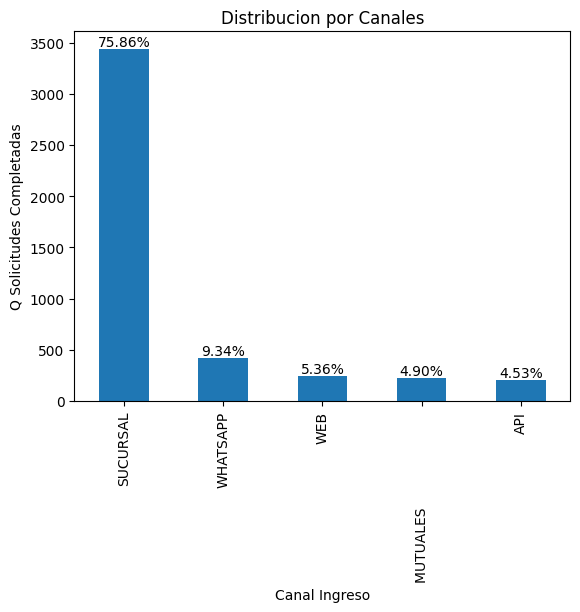

In [152]:
por_canal_desemb = solic_unicas.groupby ('TX_CANAL_ORIGINAL')['VL_DESEMBOLSADO'].agg(lambda x: x.sum()/1000000)
df_top5_canales = por_canal_desemb.sort_values(ascending=False).head(5)
porc_canal = df_top5_canales / df_top5_canales.sum()*100

ax = df_top5_canales.plot(kind='bar')
ax.bar_label(ax.containers[0], labels=[f'{p:1.2f}%' for p in porc_canal])
plt.xlabel('Canal Ingreso')
plt.ylabel('Q Solicitudes Completadas')
plt.title ('Distribucion por Canales')
plt.show()


#### OBSERVAMOS:
De los 5 canales más representativos, vemos que:
* Canal Sucursal REPRESENTA el 76% del total de la Colocación (Ventas Completadas).
* Canal WhatsApp alcanza el 10%, como segundo Canal con mayor participación, duplicando al resto de los canales.

Los canales TRADICIONALES, donde existe la participación ***Humana***, siguen siendo el mejor canal de conversión en cuanto a resultados.

## Trabajar Con COLUMNAS:
Partiendo desde el Ultimo DS - "solic_unicas":
* Analizar Información de cada Columna
* Aporte de valor al analisis
* Información con datos numericos y categoricos
* Transformación de datos categoricos
    + Tecnicas de One Hot Encoder
    + Tecnicas de Label Encoding
    + Tecnicas de Ordenamiento Ordinal

In [153]:
solic_unicas.head()

,NU_EVALUACION,CD_CLIENTE,CD_SUCURSAL,TX_SEXO,NU_EDAD,TX_ESTADO_CIVIL,NU_ANTIGUEDAD_LABORAL,TX_TIPO_EMPLEO_CLIENTE,TX_PROVINCIA,TX_TIPO_CLIENTE,...,VL_MONTO_MAXIMO,VL_SCORE_DEMOGRAFICO,VL_SCORE_CENDEU,VL_SCORE_NOSIS,VL_SCORE_VERAZ,NU_PRODUCTO,FC_LIQUIDACION,CD_PRODUCTO,VL_DESEMBOLSADO,VL_CUOTA
0,11359589,2730873.0,604.0,MASCULINO,47.0,SOLTERO,25.0,FUERZAS ARMADAS SUBOFICIALES,TUCUMAN,NUEVO,...,53897628.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11693929,4757803.0,61.0,FEMENINO,28.0,SOLTERO,5.0,FUERZAS ARMADAS OFICIALES,BUENOS AIRES,NUEVO,...,53897628.0,808.0,NaN,NaN,NaN,8.200962e+11,2022-01-10 00:00:00.000,515.0,360027.20,23028.69
2,11696298,4773004.0,146.0,MASCULINO,35.0,SOLTERO,5.0,FUERZAS ARMADAS SUBOFICIALES,BUENOS AIRES,NUEVO,...,53897628.0,741.0,NaN,NaN,NaN,8.200961e+11,2022-01-03 00:00:00.000,515.0,320000.00,24283.71
3,11698605,4647990.0,156.0,FEMENINO,42.0,CASADO,5.0,FUERZAS ARMADAS,BUENOS AIRES,NUEVO,...,53897628.0,874.0,NaN,NaN,NaN,8.200962e+11,2022-01-15 00:00:00.000,515.0,200000.84,22009.60
4,11706908,4584389.0,1.0,MASCULINO,27.0,SOLTERO,2.0,EMPL. ESTATAL,BUENOS AIRES,NUEVO,...,53897628.0,809.0,NaN,NaN,NaN,8.200961e+11,2022-01-03 00:00:00.000,518.0,160000.00,17612.93


In [154]:
solic_unicas.columns

Index(['NU_EVALUACION', 'CD_CLIENTE', 'CD_SUCURSAL', 'TX_SEXO', 'NU_EDAD',
       'TX_ESTADO_CIVIL', 'NU_ANTIGUEDAD_LABORAL', 'TX_TIPO_EMPLEO_CLIENTE',
       'TX_PROVINCIA', 'TX_TIPO_CLIENTE', 'TX_ESTADO_EVALUACION_DWH',
       'TX_CANAL_ORIGINAL', 'VL_INGRESO_NOSIS', 'VL_INGRESO_VERAZ',
       'VL_CUOTA_MAXIMA', 'VL_MONTO_MAXIMO', 'VL_SCORE_DEMOGRAFICO',
       'VL_SCORE_CENDEU', 'VL_SCORE_NOSIS', 'VL_SCORE_VERAZ', 'NU_PRODUCTO',
       'FC_LIQUIDACION', 'CD_PRODUCTO', 'VL_DESEMBOLSADO', 'VL_CUOTA'],
      dtype='object')

In [155]:
col_eliminar = ['NU_EVALUACION', 'CD_SUCURSAL', 'TX_PROVINCIA','VL_SCORE_CENDEU', 
                'VL_CUOTA_MAXIMA', 'VL_MONTO_MAXIMO','VL_INGRESO_VERAZ','NU_PRODUCTO','FC_LIQUIDACION', 
                'CD_PRODUCTO','TX_TIPO_EMPLEO_CLIENTE','VL_SCORE_DEMOGRAFICO', 'VL_INGRESO_VERAZ','VL_SCORE_CENDEU']
solic_unicas = solic_unicas.drop(columns=col_eliminar)
solic_unicas.head()

,CD_CLIENTE,TX_SEXO,NU_EDAD,TX_ESTADO_CIVIL,NU_ANTIGUEDAD_LABORAL,TX_TIPO_CLIENTE,TX_ESTADO_EVALUACION_DWH,TX_CANAL_ORIGINAL,VL_INGRESO_NOSIS,VL_SCORE_NOSIS,VL_SCORE_VERAZ,VL_DESEMBOLSADO,VL_CUOTA
0,2730873.0,MASCULINO,47.0,SOLTERO,25.0,NUEVO,APROBADA,SUCURSAL,NaN,NaN,NaN,NaN,NaN
1,4757803.0,FEMENINO,28.0,SOLTERO,5.0,NUEVO,APROBADA,MUTUALES,NaN,NaN,NaN,360027.20,23028.69
2,4773004.0,MASCULINO,35.0,SOLTERO,5.0,NUEVO,APROBADA,MUTUALES,NaN,NaN,NaN,320000.00,24283.71
3,4647990.0,FEMENINO,42.0,CASADO,5.0,NUEVO,APROBADA,MUTUALES,NaN,NaN,NaN,200000.84,22009.60
4,4584389.0,MASCULINO,27.0,SOLTERO,2.0,NUEVO,APROBADA,MUTUALES,NaN,NaN,NaN,160000.00,17612.93


In [156]:
solic_unicas.columns

Index(['CD_CLIENTE', 'TX_SEXO', 'NU_EDAD', 'TX_ESTADO_CIVIL',
       'NU_ANTIGUEDAD_LABORAL', 'TX_TIPO_CLIENTE', 'TX_ESTADO_EVALUACION_DWH',
       'TX_CANAL_ORIGINAL', 'VL_INGRESO_NOSIS', 'VL_SCORE_NOSIS',
       'VL_SCORE_VERAZ', 'VL_DESEMBOLSADO', 'VL_CUOTA'],
      dtype='object')

In [157]:
nan_sol_unicas = solic_unicas.isna().sum()
porc_nan_sol_unicas = (nan_sol_unicas / solic_unicas.shape[0])*100
porc_nan_sol_unicas

CD_CLIENTE                   0.000270
TX_SEXO                      0.023730
NU_EDAD                      0.000270
TX_ESTADO_CIVIL              1.443456
NU_ANTIGUEDAD_LABORAL        1.619001
TX_TIPO_CLIENTE              0.000000
TX_ESTADO_EVALUACION_DWH     0.000000
TX_CANAL_ORIGINAL            0.000000
VL_INGRESO_NOSIS            52.979943
VL_SCORE_NOSIS              27.794287
VL_SCORE_VERAZ              27.836353
VL_DESEMBOLSADO             78.276427
VL_CUOTA                    78.276427
dtype: float64

#### Transformar Variables Categoricas en Numericas: One Hot Encoder
Libreria: 
* from sklearn.preprocessing import OneHotEncoder

In [158]:
new_solic = pd.DataFrame(solic_unicas)

categorical_columns = ['TX_SEXO', 'TX_ESTADO_CIVIL', 'TX_TIPO_CLIENTE', 'TX_CANAL_ORIGINAL', 'VL_INGRESO_NOSIS']
categorical_data = new_solic[categorical_columns]

encoder = OneHotEncoder(sparse=False)  
encoded_data = encoder.fit_transform(categorical_data)

column_names = encoder.get_feature_names_out(input_features=categorical_columns)
encoded_solic = pd.DataFrame(encoded_data, columns=column_names)

encoded_new_solic = pd.concat([new_solic.drop(columns=categorical_columns), encoded_solic], axis=1)

mapping = {'APROBADA': 1, 'RECHAZADA': 0}
encoded_new_solic['TX_ESTADO_EVALUACION_DWH'] = encoded_new_solic['TX_ESTADO_EVALUACION_DWH'].map(mapping)

C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [159]:
encoded_new_solic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637712 entries, 0 to 370845
Data columns (total 52 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   CD_CLIENTE                                        370845 non-null  float64
 1   NU_EDAD                                           370845 non-null  float64
 2   NU_ANTIGUEDAD_LABORAL                             364842 non-null  float64
 3   TX_ESTADO_EVALUACION_DWH                          370846 non-null  float64
 4   VL_SCORE_NOSIS                                    267772 non-null  float64
 5   VL_SCORE_VERAZ                                    267616 non-null  float64
 6   VL_DESEMBOLSADO                                   80561 non-null   float64
 7   VL_CUOTA                                          80561 non-null   float64
 8   TX_SEXO_FEMENINO                                  370846 non-null  float64
 9   TX_SEXO_M

#### Resultado:
* Variables categoricas todas transformadas a Numericas.
* Variables Independientes todas numericas
* Variable Dependiente "TX_ESTADO_EVALUACION_DWH":
    - Transformar a Numerica con cardinalidad.
    1) Aprobado = 1
    2) Rechazada = 0

In [160]:
encoded_new_solic.groupby('TX_ESTADO_EVALUACION_DWH').size()

TX_ESTADO_EVALUACION_DWH
0.0    205418
1.0    165428
dtype: int64

-------------------------------------------------------------------------------------------------------------------------------

## 2) Carga Data Set "comportamiento":

In [162]:
ruta_comportamiento = 'C:\VDi Control Gestión (PC Local)\DS\Comportamiento_Pago_36.csv'
comportamiento = pd.read_csv(ruta_comportamiento, delimiter = ';')
comportamiento.head()

,NU_PRODUCTO,CD_PRODUCTO,cd_cliente,CD_SUCURSAL_ASIGNADA,CD_ESTADO_PRODUCTO,CD_SUBESTADO_PRODUCTO,FC_ALTA,FC_NO_VIGENCIA,VL_DEUDA_TOTAL,VL_EFECTIVO_ENTREGADO,...,NU_CUOTAS_EN_MORA,VL_CUOTA,VL_TASA_NOMINAL_ANUAL,CD_PRODUCTO_ORIGINAL,CD_SUCURSAL_VENTA,FC_LIQUIDACION,FC_PRIMER_VENCIMIENTO,FC_ULTIMO_VENCIMIENTO,NU_DIAS_MORA,VL_DEUDA_VENCIDA
0,820084264948,131,4513335,38,NO VIGENTE,CANCELADO,2020-01-02 00:00:00.000,2021-06-07 00:00:00.000,NaN,35000.00,...,0,6482.37,139.99,131,38,2020-01-02 00:00:00.000,2020-02-10 00:00:00.000,2021-01-10 00:00:00.000,NaN,0.0
1,820084264955,129,2944171,88,NO VIGENTE,CANCELADO,2020-01-02 00:00:00.000,2020-10-06 00:00:00.000,NaN,19500.00,...,0,4964.50,139.99,129,88,2020-01-02 00:00:00.000,2020-02-05 00:00:00.000,2021-07-05 00:00:00.000,NaN,0.0
2,820084264978,116,2807256,53,NO VIGENTE,CANCELADO,2020-01-02 00:00:00.000,2021-02-02 00:00:00.000,NaN,0.00,...,0,6412.79,89.99,116,53,2020-01-02 00:00:00.000,2020-02-10 00:00:00.000,2021-01-10 00:00:00.000,NaN,0.0
3,820084265079,110,4426975,142,NO VIGENTE,CANCELADO,2020-01-02 00:00:00.000,2021-02-02 00:00:00.000,NaN,7000.00,...,0,3583.19,104.99,110,142,2020-01-02 00:00:00.000,2020-02-16 00:00:00.000,2021-01-16 00:00:00.000,NaN,0.0
4,820084265148,31,4634054,54,NO VIGENTE,CANCELADO,2020-01-02 00:00:00.000,2021-01-12 00:00:00.000,NaN,29000.46,...,0,3954.10,99.00,31,54,2020-01-02 00:00:00.000,2020-03-07 00:00:00.000,2021-08-07 00:00:00.000,NaN,0.0


In [202]:
comportamiento.shape[0]

485231

#### Identificar tipo de Datos del DS:

In [163]:
comportamiento.columns = comportamiento.columns.str.upper()
comportamiento.columns

Index(['NU_PRODUCTO', 'CD_PRODUCTO', 'CD_CLIENTE', 'CD_SUCURSAL_ASIGNADA',
       'CD_ESTADO_PRODUCTO', 'CD_SUBESTADO_PRODUCTO', 'FC_ALTA',
       'FC_NO_VIGENCIA', 'VL_DEUDA_TOTAL', 'VL_EFECTIVO_ENTREGADO',
       'FL_WRITEOFF', 'CD_CAJON_MORA', 'CD_SITUACION_BCRA', 'FL_JUICIO',
       'VL_MONTO_MAXIMO_OFRECIDO', 'VL_MONTO_LIQUIDADO', 'NU_CUOTAS',
       'NU_CUOTA_PAGADAS', 'NU_CUOTAS_EN_MORA', 'VL_CUOTA',
       'VL_TASA_NOMINAL_ANUAL', 'CD_PRODUCTO_ORIGINAL', 'CD_SUCURSAL_VENTA',
       'FC_LIQUIDACION', 'FC_PRIMER_VENCIMIENTO', 'FC_ULTIMO_VENCIMIENTO',
       'NU_DIAS_MORA', 'VL_DEUDA_VENCIDA'],
      dtype='object')

In [164]:
comportamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485231 entries, 0 to 485230
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   NU_PRODUCTO               485231 non-null  int64  
 1   CD_PRODUCTO               485231 non-null  int64  
 2   CD_CLIENTE                485231 non-null  int64  
 3   CD_SUCURSAL_ASIGNADA      485231 non-null  int64  
 4   CD_ESTADO_PRODUCTO        485231 non-null  object 
 5   CD_SUBESTADO_PRODUCTO     485231 non-null  object 
 6   FC_ALTA                   485231 non-null  object 
 7   FC_NO_VIGENCIA            332737 non-null  object 
 8   VL_DEUDA_TOTAL            171673 non-null  float64
 9   VL_EFECTIVO_ENTREGADO     485231 non-null  float64
 10  FL_WRITEOFF               485231 non-null  int64  
 11  CD_CAJON_MORA             171673 non-null  float64
 12  CD_SITUACION_BCRA         171673 non-null  float64
 13  FL_JUICIO                 485231 non-null  i

#### Cantidad de Datos Nulos:

In [165]:
nan_comport = comportamiento.isna().sum()
nan_comport

NU_PRODUCTO                      0
CD_PRODUCTO                      0
CD_CLIENTE                       0
CD_SUCURSAL_ASIGNADA             0
CD_ESTADO_PRODUCTO               0
CD_SUBESTADO_PRODUCTO            0
FC_ALTA                          0
FC_NO_VIGENCIA              152494
VL_DEUDA_TOTAL              313558
VL_EFECTIVO_ENTREGADO            0
FL_WRITEOFF                      0
CD_CAJON_MORA               313558
CD_SITUACION_BCRA           313558
FL_JUICIO                        0
VL_MONTO_MAXIMO_OFRECIDO         0
VL_MONTO_LIQUIDADO               0
NU_CUOTAS                        0
NU_CUOTA_PAGADAS                 0
NU_CUOTAS_EN_MORA                0
VL_CUOTA                         0
VL_TASA_NOMINAL_ANUAL            0
CD_PRODUCTO_ORIGINAL             0
CD_SUCURSAL_VENTA                0
FC_LIQUIDACION                   0
FC_PRIMER_VENCIMIENTO            0
FC_ULTIMO_VENCIMIENTO            0
NU_DIAS_MORA                313558
VL_DEUDA_VENCIDA                 0
dtype: int64

In [166]:
comportamiento.groupby('CD_SUBESTADO_PRODUCTO').size()

CD_SUBESTADO_PRODUCTO
AL DIA            74401
ANULADO           12270
CANCELADO        304005
EXTRACONTABLE      2044
MORA < 90         14676
MORA > 90         53160
NO DEFINIDO         724
NO LIQUIDADO         69
PROBLEMAS          3166
VENDIDO              41
WRITE OFF         20675
dtype: int64

#### Eliminar Estados Cancelado, Extracontable, No Definido, No Liquidado, Vendido:
Para obtener datos actualizados y evitar tener duplicados sobre productos cancelados.

In [167]:
estados_eliminar = ["CANCELADO", "EXTRACONTABLE", "NO DEFINIDO", "NO LIQUIDADO", "VENDIDO"]
comport_filtrado = comportamiento[~comportamiento['CD_SUBESTADO_PRODUCTO'].isin(estados_eliminar)]
comport_filtrado.groupby('CD_SUBESTADO_PRODUCTO').size()

CD_SUBESTADO_PRODUCTO
AL DIA       74401
ANULADO      12270
MORA < 90    14676
MORA > 90    53160
PROBLEMAS     3166
WRITE OFF    20675
dtype: int64

In [169]:
comport_filtrado.shape

(178348, 28)

#### Cantidad de Datos Duplicados:

In [170]:
comport_dup = comport_filtrado['CD_CLIENTE'].duplicated().sum()
total_filas = len(comport_filtrado)
porc_dup_comport = (comport_dup / total_filas)*100
porc_dup_comport

12.90454616816561

In [171]:
comport_unicos = comport_filtrado.drop_duplicates(subset=['CD_CLIENTE'])
comport_unicos.head()

,NU_PRODUCTO,CD_PRODUCTO,CD_CLIENTE,CD_SUCURSAL_ASIGNADA,CD_ESTADO_PRODUCTO,CD_SUBESTADO_PRODUCTO,FC_ALTA,FC_NO_VIGENCIA,VL_DEUDA_TOTAL,VL_EFECTIVO_ENTREGADO,...,NU_CUOTAS_EN_MORA,VL_CUOTA,VL_TASA_NOMINAL_ANUAL,CD_PRODUCTO_ORIGINAL,CD_SUCURSAL_VENTA,FC_LIQUIDACION,FC_PRIMER_VENCIMIENTO,FC_ULTIMO_VENCIMIENTO,NU_DIAS_MORA,VL_DEUDA_VENCIDA
16,820084265469,137,200807,38,NO VIGENTE,PROBLEMAS,2020-01-02 00:00:00.000,2021-04-08 00:00:00.000,NaN,0.0,...,0,9974.55,95.99,137,38,2020-01-02 00:00:00.000,2020-02-10 00:00:00.000,2021-07-10 00:00:00.000,NaN,0.00
17,820084265482,801,915025,38,NO VIGENTE,WRITE OFF,2020-01-02 00:00:00.000,2021-10-01 00:00:00.000,151096.28,50000.0,...,23,6839.94,122.00,102,38,2020-01-02 00:00:00.000,2020-02-10 00:00:00.000,2022-01-10 00:00:00.000,1146.0,14205.24
22,820084265606,801,4634046,64,NO VIGENTE,WRITE OFF,2020-01-02 00:00:00.000,2022-12-06 00:00:00.000,15820.99,0.0,...,4,4103.72,99.00,31,64,2020-01-02 00:00:00.000,2020-04-01 00:00:00.000,2021-09-01 00:00:00.000,698.0,16414.80
47,820084266134,801,4634052,64,NO VIGENTE,WRITE OFF,2020-01-02 00:00:00.000,2022-12-06 00:00:00.000,18707.32,0.0,...,4,4852.37,99.00,31,64,2020-01-02 00:00:00.000,2020-04-01 00:00:00.000,2021-09-01 00:00:00.000,698.0,19409.48
57,820084266385,801,4634071,11,NO VIGENTE,WRITE OFF,2020-01-02 00:00:00.000,2021-09-01 00:00:00.000,8757.84,8000.0,...,12,1607.64,139.99,128,11,2020-01-02 00:00:00.000,2020-02-16 00:00:00.000,2021-01-16 00:00:00.000,1169.0,19395.51


In [172]:
comport_unicos.isna().sum()

NU_PRODUCTO                      0
CD_PRODUCTO                      0
CD_CLIENTE                       0
CD_SUCURSAL_ASIGNADA             0
CD_ESTADO_PRODUCTO               0
CD_SUBESTADO_PRODUCTO            0
FC_ALTA                          0
FC_NO_VIGENCIA              130414
VL_DEUDA_TOTAL               13754
VL_EFECTIVO_ENTREGADO            0
FL_WRITEOFF                      0
CD_CAJON_MORA                13754
CD_SITUACION_BCRA            13754
FL_JUICIO                        0
VL_MONTO_MAXIMO_OFRECIDO         0
VL_MONTO_LIQUIDADO               0
NU_CUOTAS                        0
NU_CUOTA_PAGADAS                 0
NU_CUOTAS_EN_MORA                0
VL_CUOTA                         0
VL_TASA_NOMINAL_ANUAL            0
CD_PRODUCTO_ORIGINAL             0
CD_SUCURSAL_VENTA                0
FC_LIQUIDACION                   0
FC_PRIMER_VENCIMIENTO            0
FC_ULTIMO_VENCIMIENTO            0
NU_DIAS_MORA                 13754
VL_DEUDA_VENCIDA                 0
dtype: int64

In [173]:
comport_unicos.columns

Index(['NU_PRODUCTO', 'CD_PRODUCTO', 'CD_CLIENTE', 'CD_SUCURSAL_ASIGNADA',
       'CD_ESTADO_PRODUCTO', 'CD_SUBESTADO_PRODUCTO', 'FC_ALTA',
       'FC_NO_VIGENCIA', 'VL_DEUDA_TOTAL', 'VL_EFECTIVO_ENTREGADO',
       'FL_WRITEOFF', 'CD_CAJON_MORA', 'CD_SITUACION_BCRA', 'FL_JUICIO',
       'VL_MONTO_MAXIMO_OFRECIDO', 'VL_MONTO_LIQUIDADO', 'NU_CUOTAS',
       'NU_CUOTA_PAGADAS', 'NU_CUOTAS_EN_MORA', 'VL_CUOTA',
       'VL_TASA_NOMINAL_ANUAL', 'CD_PRODUCTO_ORIGINAL', 'CD_SUCURSAL_VENTA',
       'FC_LIQUIDACION', 'FC_PRIMER_VENCIMIENTO', 'FC_ULTIMO_VENCIMIENTO',
       'NU_DIAS_MORA', 'VL_DEUDA_VENCIDA'],
      dtype='object')

In [174]:
comport_unicos.groupby('CD_ESTADO_PRODUCTO').size()

CD_ESTADO_PRODUCTO
NO VIGENTE     30862
VIGENTE       124471
dtype: int64

In [207]:
comport_unicos.shape[0]

155333

### RELACION entre CUOTAS PAGAS y VALOR CUOTA:

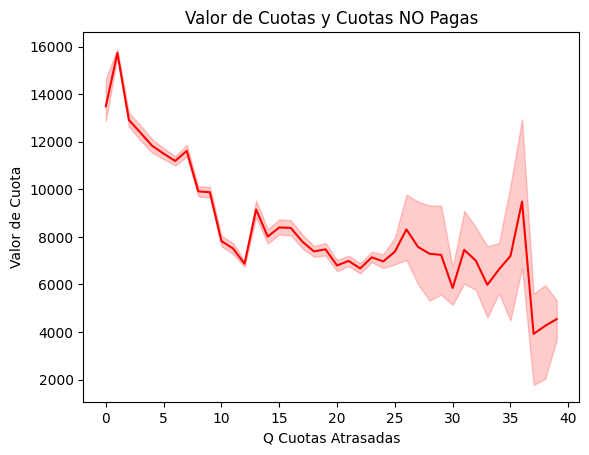

In [206]:
ax = sns.lineplot(x='NU_CUOTAS_EN_MORA', y='VL_CUOTA', data=comport_unicos, color ='r')
plt.xlabel ('Q Cuotas Atrasadas')
plt.ylabel ('Valor de Cuota')
plt.title ('Valor de Cuotas y Cuotas NO Pagas')
plt.show()

En este Gráfico podemos observar la relación que existe entre el Importe de la cuota y el atraso en el pago. Este gráfico por si solo es "DIFICIL" de analizar con estas dos variables, ya que en este caso deberiamos poder asociar otras variables, tales como "fecha de Alta del crédito", "Importe Desembolsado" y "tipo de cliente", ya que difiere el comportamiento si es cliente CONOCIDO a cliente NUEVO, como tambien la fecha, debido a los Importes Maximos a Prestar y la Fecha, por el impacto de las paritarias en los sueldos y la inflación, en el comportamiento de pago del cliente.

### RELACION entre TASA y CUOTAS PAGAS:

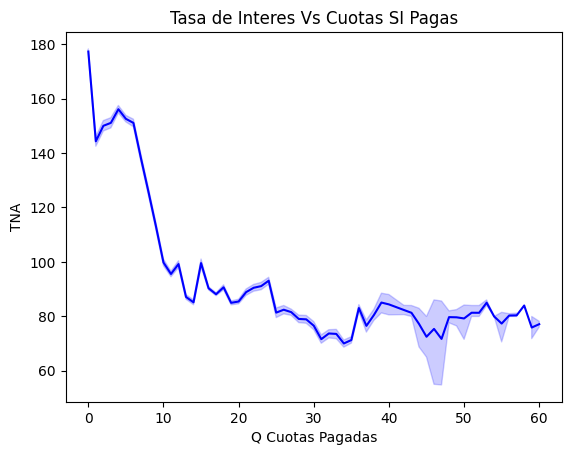

In [178]:
ax = sns.lineplot(x='NU_CUOTA_PAGADAS', y='VL_TASA_NOMINAL_ANUAL', data=comport_unicos, color ='b')
plt.xlabel ('Q Cuotas Pagadas')
plt.ylabel ('TNA')
plt.title ('Tasa de Interes Vs Cuotas SI Pagas')

plt.show()

En este Gráfico, vemos el impacto de la Tasa de Interes en la cantidad de cuotas pagadas, de la misma manera que en el gráfico anterior, es necesario tener en cuenta otras variables para el analisis, tales como clientes Conocidos (donde la TNA es menor por el riesgo asociado). Las altas tasas estan asociados a clientes Nuevos o identificados de riesgo alto.
Dondo tambien impacta el importe de la cuota, el nivel de ingreso y el endeudamiento en el sistema financiero, entre otras variables.
Por lo que es necesario para una mejor analisis, incluir una mayor cantidad de variables y poder así identificar las relaciones o correlaciones entre ellas.

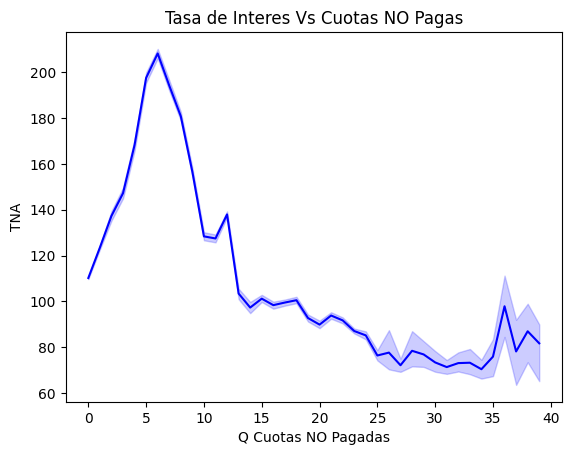

In [180]:
ax = sns.lineplot(x='NU_CUOTAS_EN_MORA', y='VL_TASA_NOMINAL_ANUAL', data=comport_unicos, color ='b')
plt.xlabel ('Q Cuotas NO Pagadas')
plt.ylabel ('TNA')
plt.title ('Tasa de Interes Vs Cuotas NO Pagas')

plt.show()

En este Gráfico podemos observar un comportamiento esperado, donde a mayor tasa de interes, el pago de las cuotas se va deteriorando. Las altas tasas de interés estan relacionadas directamente con el riesgo del cliente, es decir a más tasa, mayor el riesgo y a la inversa, tambien podemos ver que en el largo plazo, se deteriora el comportamiento de clientes con mejor nivel de riesgo (tasas más bajas). **Consideraciones**:
* Debemos analizar más profundamente este gráfico, segmentando Clientes Conocidos de Clientes Nuevos.
* Plazo de Financiación y poder tener una relación entre Tasa de Interes y periodo en que se define el No pago de las cuotas.

#### Analizar Cada Variable y la información que posee:
Eliminar Columnas con información no necesaria

In [181]:
col_eliminar_comport = ['NU_PRODUCTO', 'CD_PRODUCTO', 'CD_SUCURSAL_ASIGNADA',
       'CD_ESTADO_PRODUCTO', 'FC_ALTA','FC_NO_VIGENCIA', 'VL_DEUDA_TOTAL', 'VL_EFECTIVO_ENTREGADO',
       'FL_WRITEOFF', 'CD_SITUACION_BCRA', 'FL_JUICIO','VL_MONTO_MAXIMO_OFRECIDO', 'NU_CUOTA_PAGADAS', 
       'CD_PRODUCTO_ORIGINAL', 'CD_SUCURSAL_VENTA',
       'FC_LIQUIDACION', 'FC_PRIMER_VENCIMIENTO', 'FC_ULTIMO_VENCIMIENTO']
comport_unicos = comport_unicos.drop(col_eliminar_comport, axis=1)
comport_unicos.head()

,CD_CLIENTE,CD_SUBESTADO_PRODUCTO,CD_CAJON_MORA,VL_MONTO_LIQUIDADO,NU_CUOTAS,NU_CUOTAS_EN_MORA,VL_CUOTA,VL_TASA_NOMINAL_ANUAL,NU_DIAS_MORA,VL_DEUDA_VENCIDA
16,200807,PROBLEMAS,NaN,80525.0,18,0,9974.55,95.99,NaN,0.00
17,915025,WRITE OFF,22.0,51423.0,24,23,6839.94,122.00,1146.0,14205.24
22,4634046,WRITE OFF,22.0,29304.0,18,4,4103.72,99.00,698.0,16414.80
47,4634052,WRITE OFF,22.0,34650.0,18,4,4852.37,99.00,698.0,19409.48
57,4634071,WRITE OFF,22.0,8654.0,12,12,1607.64,139.99,1169.0,19395.51


In [182]:
comport_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155333 entries, 16 to 485230
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CD_CLIENTE             155333 non-null  int64  
 1   CD_SUBESTADO_PRODUCTO  155333 non-null  object 
 2   CD_CAJON_MORA          141579 non-null  float64
 3   VL_MONTO_LIQUIDADO     155333 non-null  float64
 4   NU_CUOTAS              155333 non-null  int64  
 5   NU_CUOTAS_EN_MORA      155333 non-null  int64  
 6   VL_CUOTA               155333 non-null  float64
 7   VL_TASA_NOMINAL_ANUAL  155333 non-null  float64
 8   NU_DIAS_MORA           141579 non-null  float64
 9   VL_DEUDA_VENCIDA       155333 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 13.0+ MB


### Trabajar Con COLUMNAS:
Partiendo desde el Ultimo DS - "comport_unicos":
* Analizar Información de cada Columna
* Aporte de valor al analisis
* Información con datos numericos y categoricos
* Transformación de datos categoricos
    + Tecnicas de One Hot Encoder
    + Tecnicas de Label Encoding
    + Tecnicas de Ordenamiento Ordinal

In [183]:
comport_unicos.columns

Index(['CD_CLIENTE', 'CD_SUBESTADO_PRODUCTO', 'CD_CAJON_MORA',
       'VL_MONTO_LIQUIDADO', 'NU_CUOTAS', 'NU_CUOTAS_EN_MORA', 'VL_CUOTA',
       'VL_TASA_NOMINAL_ANUAL', 'NU_DIAS_MORA', 'VL_DEUDA_VENCIDA'],
      dtype='object')

In [184]:
comport_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155333 entries, 16 to 485230
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CD_CLIENTE             155333 non-null  int64  
 1   CD_SUBESTADO_PRODUCTO  155333 non-null  object 
 2   CD_CAJON_MORA          141579 non-null  float64
 3   VL_MONTO_LIQUIDADO     155333 non-null  float64
 4   NU_CUOTAS              155333 non-null  int64  
 5   NU_CUOTAS_EN_MORA      155333 non-null  int64  
 6   VL_CUOTA               155333 non-null  float64
 7   VL_TASA_NOMINAL_ANUAL  155333 non-null  float64
 8   NU_DIAS_MORA           141579 non-null  float64
 9   VL_DEUDA_VENCIDA       155333 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 13.0+ MB


* Variable "CD_SUBESTADO_PRODUCTO", continua como objeto, es la variable Dependiente, explicada.
* Resto de las Variables son Numericas

#### AGRUPACION: Por Cajon de MORA y Sub Estado:
* Porcentaje por Cajon y SubEstado


In [185]:
ag_sub_est = comport_unicos.pivot_table(index='CD_CAJON_MORA', columns='CD_SUBESTADO_PRODUCTO', aggfunc='size', fill_value=0)
cant_total = ag_sub_est.sum(axis=1)
porc_sub_est = ag_sub_est.div(cant_total, axis=0) * 100
porc_sub_est

CD_SUBESTADO_PRODUCTO,AL DIA,ANULADO,MORA < 90,MORA > 90,WRITE OFF
CD_CAJON_MORA,,,,,
0.0,98.522759,0.004392,0.458252,1.011669,0.002928
1.0,0.000000,0.000000,98.904724,1.082080,0.013196
2.0,0.000000,0.000000,96.640361,3.359639,0.000000
3.0,0.000000,0.000000,19.995759,79.983036,0.021204
4.0,0.000000,0.000000,7.161235,92.795883,0.042882
5.0,0.000000,0.000000,4.402985,95.559701,0.037313
6.0,0.000000,0.000000,4.776002,95.145056,0.078942
7.0,0.000000,0.000000,0.000000,99.977802,0.022198
8.0,0.000000,0.000000,0.000000,99.945340,0.054660


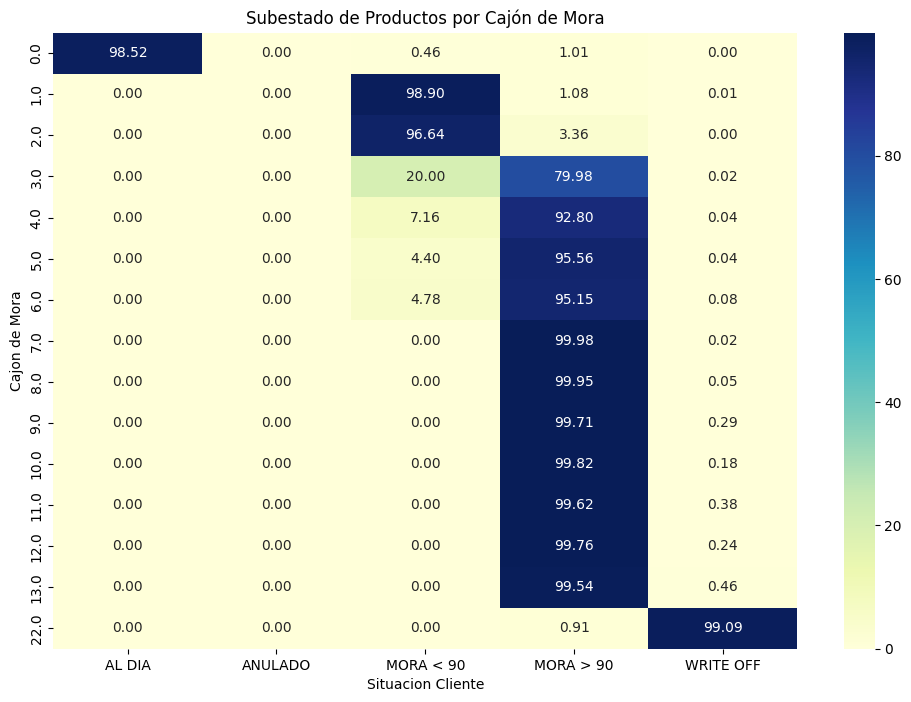

In [186]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(porc_sub_est, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Subestado de Productos por Cajón de Mora")
plt.xlabel("Situacion Cliente")
plt.ylabel("Cajon de Mora")
plt.show()

In [187]:
ag_sub_est_cant= comport_unicos.pivot_table(index='CD_CAJON_MORA', columns='CD_SUBESTADO_PRODUCTO', aggfunc='size', fill_value=0)
ag_sub_est_cant ['TOTAL'] = ag_sub_est_cant.sum(axis=1)
ag_sub_est_cant

CD_SUBESTADO_PRODUCTO,AL DIA,ANULADO,MORA < 90,MORA > 90,WRITE OFF,TOTAL
CD_CAJON_MORA,,,,,,
0.0,67294,3,313,691,2,68303
1.0,0,0,7495,82,1,7578
2.0,0,0,4286,149,0,4435
3.0,0,0,943,3772,1,4716
4.0,0,0,334,4328,2,4664
5.0,0,0,236,5122,2,5360
6.0,0,0,242,4821,4,5067
7.0,0,0,0,4504,1,4505
8.0,0,0,0,3657,2,3659


<Figure size 800x400 with 0 Axes>

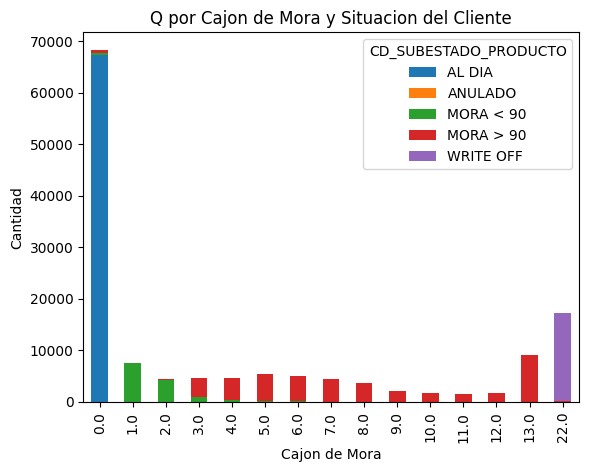

In [188]:
plt.figure(figsize=(8, 4))
ag_sub_est_cant.drop(columns='TOTAL').plot(kind='bar', stacked=True)

plt.title('Q por Cajon de Mora y Situacion del Cliente')
plt.xlabel('Cajon de Mora')
plt.ylabel('Cantidad')

plt.show()

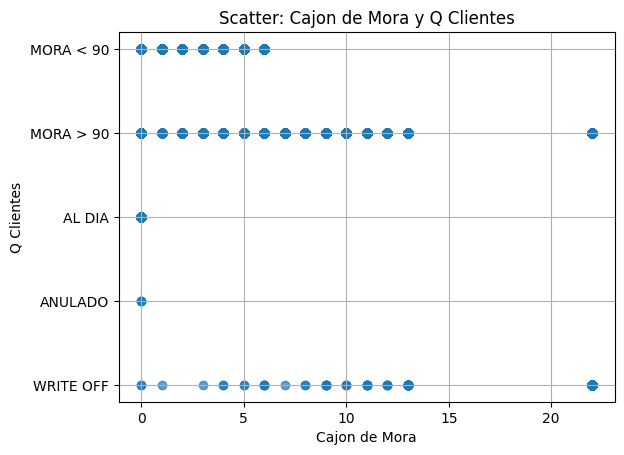

In [189]:
x = comport_unicos['CD_CAJON_MORA']
y = comport_unicos['CD_SUBESTADO_PRODUCTO']

plt.scatter(x, y, alpha=0.7)  # Crea el scatter plot

plt.title('Scatter: Cajon de Mora y Q Clientes')
plt.xlabel('Cajon de Mora')
plt.ylabel('Q Clientes')

plt.grid(True)
plt.show()

#### Trabajar sobre la Variable Dependiente:


In [190]:
comport_unicos.groupby('CD_SUBESTADO_PRODUCTO').size()

CD_SUBESTADO_PRODUCTO
AL DIA       67294
ANULADO      11140
MORA < 90    13849
MORA > 90    43328
PROBLEMAS     2610
WRITE OFF    17112
dtype: int64

In [208]:
comport_unicos.shape[0]

155333

#### Transformar Variables: One Hot Encoder
Libreria: 
* from sklearn.preprocessing import OneHotEncoder

In [191]:
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(comport_unicos[['CD_SUBESTADO_PRODUCTO']])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['CD_SUBESTADO_PRODUCTO']))
comport_unicos_encoded = pd.concat([comport_unicos, encoded_df], axis=1)

comport_unicos_encoded.drop(columns=['CD_SUBESTADO_PRODUCTO'], inplace=True)

comport_unicos_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287786 entries, 16 to 155332
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CD_CLIENTE                       155333 non-null  float64
 1   CD_CAJON_MORA                    141579 non-null  float64
 2   VL_MONTO_LIQUIDADO               155333 non-null  float64
 3   NU_CUOTAS                        155333 non-null  float64
 4   NU_CUOTAS_EN_MORA                155333 non-null  float64
 5   VL_CUOTA                         155333 non-null  float64
 6   VL_TASA_NOMINAL_ANUAL            155333 non-null  float64
 7   NU_DIAS_MORA                     141579 non-null  float64
 8   VL_DEUDA_VENCIDA                 155333 non-null  float64
 9   CD_SUBESTADO_PRODUCTO_AL DIA     155333 non-null  float64
 10  CD_SUBESTADO_PRODUCTO_ANULADO    155333 non-null  float64
 11  CD_SUBESTADO_PRODUCTO_MORA < 90  155333 non-null  float64
 12  CD_SUB

C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


-------------------------------------------------------------------------------------------------------------------------------

### UNION de los Ambos Data Set:
* Comportamiento de Pago: comport_unicos_encoded
* Solicitudes: encoded_new_solic

#### Eliminar Duplicados

In [192]:
comport_unicos_encoded = comport_unicos_encoded.drop_duplicates(subset='CD_CLIENTE')
encoded_new_solic = encoded_new_solic.drop_duplicates(subset='CD_CLIENTE')

#### Concatenar:

In [193]:
concat_df = pd.concat([comport_unicos_encoded.set_index('CD_CLIENTE'), 
                             encoded_new_solic.set_index('CD_CLIENTE')], axis=1, join='inner')
concat_df.reset_index(inplace=True)
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100888 entries, 0 to 100887
Data columns (total 66 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   CD_CLIENTE                                        100887 non-null  float64
 1   CD_CAJON_MORA                                     95469 non-null   float64
 2   VL_MONTO_LIQUIDADO                                100887 non-null  float64
 3   NU_CUOTAS                                         100887 non-null  float64
 4   NU_CUOTAS_EN_MORA                                 100887 non-null  float64
 5   VL_CUOTA                                          100887 non-null  float64
 6   VL_TASA_NOMINAL_ANUAL                             100887 non-null  float64
 7   NU_DIAS_MORA                                      95469 non-null   float64
 8   VL_DEUDA_VENCIDA                                  100887 non-null  float64
 9   CD_S

#### RESULTADO:
Data Set 'concat_df' preparado:
* Sin Variables Categoricas
* Transformado con Método "One Hot Encoder"
* Transformado con Método "Label Encoder"
* Contatenado de ambos Data Set.

-------------------------------------------------------------------------------------------------------------------------------

# INICIO Analisis del DS que contiene la Información Completa:
En este DS vamos a Eliminar la Columna CD_CLIENTE (luego de haber realizado la Concatenación NO es necesario mantener esta variable que NO aporta información para analisis)

In [194]:
col_eliminar_concat = ['CD_CLIENTE']
concat_df = concat_df.drop(col_eliminar_concat, axis=1)

In [195]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100888 entries, 0 to 100887
Data columns (total 65 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   CD_CAJON_MORA                                     95469 non-null   float64
 1   VL_MONTO_LIQUIDADO                                100887 non-null  float64
 2   NU_CUOTAS                                         100887 non-null  float64
 3   NU_CUOTAS_EN_MORA                                 100887 non-null  float64
 4   VL_CUOTA                                          100887 non-null  float64
 5   VL_TASA_NOMINAL_ANUAL                             100887 non-null  float64
 6   NU_DIAS_MORA                                      95469 non-null   float64
 7   VL_DEUDA_VENCIDA                                  100887 non-null  float64
 8   CD_SUBESTADO_PRODUCTO_AL DIA                      4033 non-null    float64
 9   CD_S

In [196]:
concat_df.columns

Index(['CD_CAJON_MORA', 'VL_MONTO_LIQUIDADO', 'NU_CUOTAS', 'NU_CUOTAS_EN_MORA',
       'VL_CUOTA', 'VL_TASA_NOMINAL_ANUAL', 'NU_DIAS_MORA', 'VL_DEUDA_VENCIDA',
       'CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
       'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
       'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF',
       'NU_EDAD', 'NU_ANTIGUEDAD_LABORAL', 'TX_ESTADO_EVALUACION_DWH',
       'VL_SCORE_NOSIS', 'VL_SCORE_VERAZ', 'VL_DESEMBOLSADO', 'VL_CUOTA',
       'TX_SEXO_FEMENINO', 'TX_SEXO_MASCULINO', 'TX_SEXO_nan',
       'TX_ESTADO_CIVIL_CASADO              ', 'TX_ESTADO_CIVIL_CASADO/A',
       'TX_ESTADO_CIVIL_DIVORCIADO          ', 'TX_ESTADO_CIVIL_DIVORCIADO/A',
       'TX_ESTADO_CIVIL_OTRO', 'TX_ESTADO_CIVIL_OTROS               ',
       'TX_ESTADO_CIVIL_SEPARADO            ', 'TX_ESTADO_CIVIL_SEPARADO/A',
       'TX_ESTADO_CIVIL_SOLTERO             ', 'TX_ESTADO_CIVIL_SOLTERO/A',
       'TX_ESTADO_CIVIL_VIUD

In [209]:
concat_df.shape[0]

100888

## Analisis del DS:

#### Completar los NaN:

In [197]:
concat_completo = concat_df.fillna(0)

In [198]:
concat_completo.head()

,CD_CAJON_MORA,VL_MONTO_LIQUIDADO,NU_CUOTAS,NU_CUOTAS_EN_MORA,VL_CUOTA,VL_TASA_NOMINAL_ANUAL,NU_DIAS_MORA,VL_DEUDA_VENCIDA,CD_SUBESTADO_PRODUCTO_AL DIA,CD_SUBESTADO_PRODUCTO_ANULADO,...,TX_CANAL_ORIGINAL_WHATSAPP,VL_INGRESO_NOSIS_A,VL_INGRESO_NOSIS_B,VL_INGRESO_NOSIS_C1,VL_INGRESO_NOSIS_C2,VL_INGRESO_NOSIS_C3,VL_INGRESO_NOSIS_D1,VL_INGRESO_NOSIS_D2,VL_INGRESO_NOSIS_NC,VL_INGRESO_NOSIS_nan
0,0.0,81294.00,13.0,0.0,11437.20,95.99,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22.0,26730.00,18.0,17.0,3525.39,99.00,1154.0,59931.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,31423.00,43.0,1.0,10903.71,95.99,0.0,10829.56,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22.0,20059.35,36.0,20.0,20022.51,89.99,697.0,400448.84,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,47600.00,40.0,1.0,10114.31,95.99,0.0,6621.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
concat_completo.shape[0]

100888

In [210]:
concat_completo.columns

Index(['CD_CAJON_MORA', 'VL_MONTO_LIQUIDADO', 'NU_CUOTAS', 'NU_CUOTAS_EN_MORA',
       'VL_CUOTA', 'VL_TASA_NOMINAL_ANUAL', 'NU_DIAS_MORA', 'VL_DEUDA_VENCIDA',
       'CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
       'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
       'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF',
       'NU_EDAD', 'NU_ANTIGUEDAD_LABORAL', 'TX_ESTADO_EVALUACION_DWH',
       'VL_SCORE_NOSIS', 'VL_SCORE_VERAZ', 'VL_DESEMBOLSADO', 'VL_CUOTA',
       'TX_SEXO_FEMENINO', 'TX_SEXO_MASCULINO', 'TX_SEXO_nan',
       'TX_ESTADO_CIVIL_CASADO              ', 'TX_ESTADO_CIVIL_CASADO/A',
       'TX_ESTADO_CIVIL_DIVORCIADO          ', 'TX_ESTADO_CIVIL_DIVORCIADO/A',
       'TX_ESTADO_CIVIL_OTRO', 'TX_ESTADO_CIVIL_OTROS               ',
       'TX_ESTADO_CIVIL_SEPARADO            ', 'TX_ESTADO_CIVIL_SEPARADO/A',
       'TX_ESTADO_CIVIL_SOLTERO             ', 'TX_ESTADO_CIVIL_SOLTERO/A',
       'TX_ESTADO_CIVIL_VIUD

## Selección de Modelo de Machine Learning a aplicar:
* Split del Data Set:
    + Train
    + Test
    + Validation

In [211]:
train_ratio = 0.7
test_ratio = 0.15
validation_ratio = 0.15

In [216]:
train_data, temp_data = train_test_split(concat_completo, test_size=1 - train_ratio, random_state=50)

In [239]:
test_data, validation_data = train_test_split(temp_data, test_size=test_ratio / (test_ratio + validation_ratio), random_state=50)

#### Split:

In [233]:
total_data_length = len(concat_completo)
train_size = int(train_ratio * total_data_length)
test_size = int(test_ratio * total_data_length)
validation_size = int(validation_ratio * total_data_length)
print('Datos Totales:', total_data_length)
print('Datos Train:', train_size)
print('Datos Test:', test_size)
print('Datos Validación:', validation_size)

Datos Totales: 100888
Datos Train: 70621
Datos Test: 15133
Datos Validación: 15133


### Modelo KNN - 5k:

In [237]:
k = 5  
knn_model = KNeighborsClassifier(n_neighbors=k)

In [240]:
X_train = train_data.drop(['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
                          'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
                          'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF'], axis=1)
y_train = train_data[['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
                      'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
                      'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF']]
knn_model.fit(X_train, y_train)
X_test = test_data.drop(['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
                        'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
                        'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF'], axis=1)

In [244]:
predict = knn_model.predict(X_test)

In [245]:
print(classification_report(test_data[['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
                                       'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
                                       'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF']], predict))

              precision    recall  f1-score   support

           0       0.24      0.03      0.06       266
           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        58
           3       0.00      0.00      0.00       184
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        26

   micro avg       0.17      0.02      0.03       577
   macro avg       0.04      0.01      0.01       577
weighted avg       0.11      0.02      0.03       577
 samples avg       0.00      0.00      0.00       577



C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

### Modelo KNN - 3k:

In [247]:
k = 3  
knn_model = KNeighborsClassifier(n_neighbors=k)
X_train = train_data.drop(['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
                          'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
                          'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF'], axis=1)
y_train = train_data[['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
                      'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
                      'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF']]
knn_model.fit(X_train, y_train)
X_test = test_data.drop(['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
                        'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
                        'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF'], axis=1)
predict = knn_model.predict(X_test)
print(classification_report(test_data[['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
                                       'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
                                       'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF']], predict))

              precision    recall  f1-score   support

           0       0.14      0.05      0.07       266
           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        58
           3       0.13      0.03      0.05       184
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        26

   micro avg       0.13      0.03      0.05       577
   macro avg       0.05      0.01      0.02       577
weighted avg       0.11      0.03      0.05       577
 samples avg       0.00      0.00      0.00       577



C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

#### CONCLUCIONES:
En resumen, ninguno de los dos valores de k parece ser efectivo para este conjunto de datos en particular. 
* Es posible que KNN no sea el algoritmo adecuado para este problema.
* Que se necesite un preprocesamiento de datos más complejo.
* Que sea necesario un mayor equilibrio entre las clases.
* Un ajuste de hiperparámetros.

### Modelo Logistic Regression:

Crear el Modelo de Regresión ***Multiclase***:

In [253]:
clases = ['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
          'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
          'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF']


Creamos un Diccionario para guardar los resultados del Modelo y las Predicciones:

In [254]:
models = {}
predictions = {}

Entrenar el Modelo:
* Creamos un 'for' para poder trabajar con cada una de las clases:

In [256]:
for clase in clases:
    model = LogisticRegression()
    y_train_clase = train_data[clase]
    model.fit(X_train, y_train_clase)
    models[clase] = model

C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Predicción:
* Utilizamos un 'for' para obtener el resultado de cada una de las Clases:

In [257]:
for clase in clases:
    model = models[clase]
    predictions[clase] = model.predict(X_test)

Evaluar el modelo:

In [258]:
for clase in clases:
    print(f"Resultados para la clase: {clase}")
    print(classification_report(test_data[clase], predictions[clase]))

Resultados para la clase: CD_SUBESTADO_PRODUCTO_AL DIA
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     14867
         1.0       0.34      0.04      0.07       266

    accuracy                           0.98     15133
   macro avg       0.66      0.52      0.53     15133
weighted avg       0.97      0.98      0.97     15133

Resultados para la clase: CD_SUBESTADO_PRODUCTO_ANULADO
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15100
         1.0       0.00      0.00      0.00        33

    accuracy                           1.00     15133
   macro avg       0.50      0.50      0.50     15133
weighted avg       1.00      1.00      1.00     15133

Resultados para la clase: CD_SUBESTADO_PRODUCTO_MORA < 90
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15075
         1.0       0.00      0.00      0.00        58

    accuracy 

C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### CONCLUISION:
* En las Clases Mayoritarias (0), se observa que el modelo tiene una alta precisión en cada una de las clases.
* En las Clases Minoritarias (1), el resultado es pobre en la mayoria, cercano a cero.
* El Recall en las clases Minoritarias es bajo, por lo que el modelo tiene muchos problemas para identificar los Verdaderos positivos.
* El Accuracy es alto, por la alta precisión en las Clases Mayoritarias.
* F1 Score, es bajo en las clases Minoritarias, lo que nos dice que el modelo esta Desbalanceado, no esta teniendo un buen equilibrio.

En resumen el Modelo de "LOGISTIC REGRESSION":
+ Tiene un buen rendimiento para clasificar la clase Mayoritaria.
+ No posee una buena presición para la Clase Minoritaria, puede ser por un desequilibrio o desbalanceo de clases.


#### Model Random Forest: 

Crear el Modelo:

In [261]:
random_forest_model = RandomForestClassifier(random_state=50)

Entrenar el Modelo:

In [262]:
X_train = train_data.drop(['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
                          'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
                          'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF'], axis=1)
y_train = train_data[['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
                      'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
                      'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF']]

random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

Hacer Predicciones:

In [263]:
X_test = test_data.drop(['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
                        'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
                        'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF'], axis=1)

predictions = random_forest_model.predict(X_test)


Evaluar el modelo:

In [264]:
print(classification_report(test_data[['CD_SUBESTADO_PRODUCTO_AL DIA', 'CD_SUBESTADO_PRODUCTO_ANULADO',
                                       'CD_SUBESTADO_PRODUCTO_MORA < 90', 'CD_SUBESTADO_PRODUCTO_MORA > 90',
                                       'CD_SUBESTADO_PRODUCTO_PROBLEMAS', 'CD_SUBESTADO_PRODUCTO_WRITE OFF']], predictions))

              precision    recall  f1-score   support

           0       0.51      0.09      0.16       266
           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        58
           3       0.67      0.01      0.02       184
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        26

   micro avg       0.50      0.05      0.09       577
   macro avg       0.20      0.02      0.03       577
weighted avg       0.45      0.05      0.08       577
 samples avg       0.00      0.00      0.00       577



C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

#### CONCLUSION:
* El Recall es muy bajo, es decir que la tasa de Verdaderos Positivos es bajo en todas las clases.
* Presición Baja, para todas las clases.
* F1-Score, es bajo para todas las clases, el modelo no logra ser equilibrado/balanceado.

En resumen el modelo es pobre en rendimiento y posee un desequilibrio en las clases, que hace necesario mejorar la capacidad de del modelo para identificar los "verdaderos positivos" de cada clase.

## RESUMEN de Resultado de Modelos:
De los 4 modelos, Algoritmos aplicados al Set de datos, los resultados fueron pobres. 
### Pasos a seguir:
* Revisar y equilibrar el conjunto de datos si es posible.
    * Utilizando técnicas de submuestreo o sobremuestreo de clases.
* Revisar y analizar los hiperparámetros utilizado para mejorar el rendimiento de los modelos.
* Realizar una nueva Exploración de los datos y el EDA, respecto a las variables seleccionadas y a las transformaciones realizadas durante el proceso de analisis del set hasta el momento.